In [1]:
import numpy as np
import matplotlib.pyplot as plt
from reproduction import Gen1

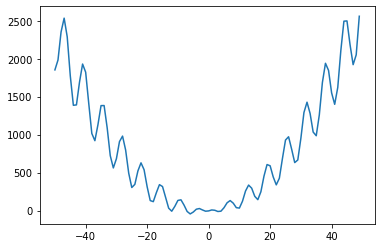

In [2]:
def function_a(x):
    x=x[0]
    return x*x+3*x-5+np.sqrt(np.sqrt(x**2))+5*np.sin(x-5)*2*x

a = 50
X =[i for i in range(-a,a)]
Y =[function_a([x]) for x in X]

plt.plot(X,Y)

In [3]:
# Experiment settings

#Hyperparameters of the model
model_par = {
    
    'cell_split_number': 10, 
    'subjects_in_cell': 1,

    'nr_clones': 5,
    'mutation_gaussian_sd': 4,

    'pins': 5,
    'gene_quality': 1,
    
}

#
input_size = 1 # since our function has one variable this is a trivial scenario.
bounds =[[-a,a]] # searching intervals for the solution

# Experiment
experiment = Gen1(function_a ,input_size, bounds, model_par)

No handles with labels found to put in legend.


gen_0 [[-43], [-39], [-20], [-20], [-9], [3], [14], [30], [37], [44]]


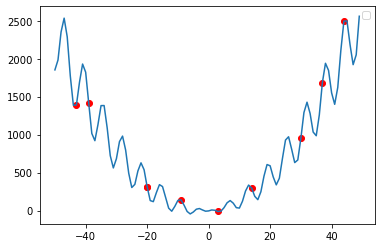

In [4]:
# first generation
# 'cell_split_number': 5 and  'subjects_in_cell': 2,
#  we expect 10 possible solutions.

gen_0 = experiment.first_generation()
experiment.actual_generation = gen_0

print("gen_0", gen_0)
plt.scatter(gen_0,[function_a(x) for x in gen_0] , c='r')
plt.plot(X,Y)
plt.legend()

clone_family: [[[-43], [-42], [-42], [-47], [-44], [-46]], [[-39], [-44], [-44], [-41], [-36], [-35]], [[-20], [-20], [-23], [-20], [-23], [-23]], [[-20], [-17], [-19], [-13], [-23], [-17]], [[-9], [-10], [-5], [-9], [-6], [-13]], [[3], [12], [2], [14], [1], [7]], [[14], [11], [12], [1], [18], [13]], [[30], [25], [26], [28], [27], [27]], [[37], [43], [34], [35], [36], [42]], [[44], [45], [46], [49], [44], [44]]]
c_dist: [[-43], [-42], [-42], [-47], [-44], [-46], [-39], [-44], [-44], [-41], [-36], [-35], [-20], [-20], [-23], [-20], [-23], [-23], [-20], [-17], [-19], [-13], [-23], [-17], [-9], [-10], [-5], [-9], [-6], [-13], [3], [12], [2], [14], [1], [7], [14], [11], [12], [1], [18], [13], [30], [25], [26], [28], [27], [27], [37], [43], [34], [35], [36], [42], [44], [45], [46], [49], [44], [44]]


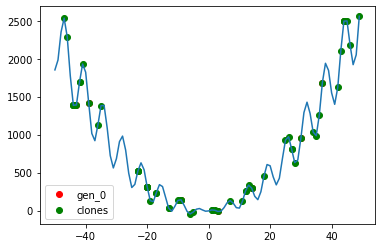

In [5]:
# mutation_1 

clone_family = experiment.mitosis()
print("clone_family:",clone_family)

c_dist=[]
for family in clone_family:
    for p in family:
        c_dist.append(p)

print("c_dist:",c_dist)

plt.scatter(gen_0,[function_a(x) for x in gen_0] , c='r', label='gen_0')
plt.scatter(c_dist,[function_a(x) for x in c_dist] , c='g', label='clones')
plt.plot(X,Y)
plt.legend()

generation: [[-44], [-36], [-20], [-13], [-6], [3], [1], [28], [35], [46]]


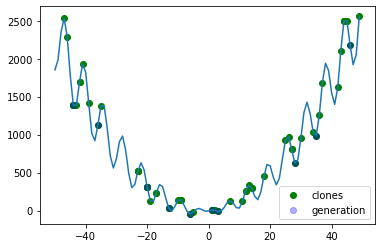

In [6]:
# kill_1

# Keep the best from each family and kill the underperformer.
generation,performances = experiment.kill(clone_family)
print("generation:",generation)

alt_performance= [-p for p in performances]

plt.scatter(c_dist,[function_a(x) for x in c_dist] , c='g', label='clones')
plt.scatter(generation, alt_performance , c='b', label='generation', alpha=0.3)
plt.plot(X,Y)
plt.legend()

new genration: [[0], [-21], [-40], [-40], [14], [-4], [-4], [-25], [-25], [-44]]


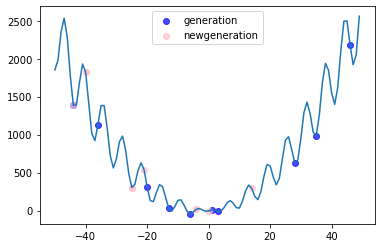

In [7]:
# reproduction_1

new_generation = experiment.reproduction(generation, performances)
print("new genration:",new_generation)

plt.scatter(generation, alt_performance , c='b', label='generation', alpha=0.7)
plt.scatter(new_generation, [function_a(x)for x in new_generation] , c='pink', label='newgeneration', alpha=0.7)
plt.plot(X,Y)
plt.legend()

clone_family: [[[0], [-3], [-3], [-1], [2], [2]], [[-21], [-24], [-20], [-21], [-25], [-15]], [[-40], [-34], [-42], [-33], [-39], [-44]], [[-40], [-37], [-35], [-42], [-41], [-40]], [[14], [7], [13], [22], [10], [7]], [[-4], [-6], [-3], [0], [-6], [3]], [[-4], [-3], [-1], [-7], [-7], [-6]], [[-25], [-24], [-32], [-28], [-25], [-23]], [[-25], [-30], [-23], [-24], [-17], [-27]], [[-44], [-43], [-43], [-38], [-38], [-44]]]
c_dist: [[0], [-3], [-3], [-1], [2], [2], [-21], [-24], [-20], [-21], [-25], [-15], [-40], [-34], [-42], [-33], [-39], [-44], [-40], [-37], [-35], [-42], [-41], [-40], [14], [7], [13], [22], [10], [7], [-4], [-6], [-3], [0], [-6], [3], [-4], [-3], [-1], [-7], [-7], [-6], [-25], [-24], [-32], [-28], [-25], [-23], [-25], [-30], [-23], [-24], [-17], [-27], [-44], [-43], [-43], [-38], [-38], [-44]]


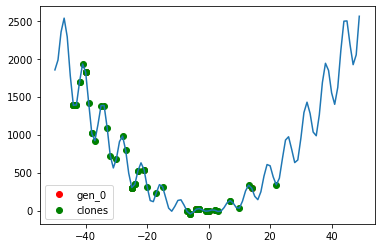

In [8]:
# mutation_2

experiment.actual_generation = new_generation
clone_family = experiment.mitosis()
print("clone_family:",clone_family)

c_dist=[]
for family in clone_family:
    for p in family:
        c_dist.append(p)

print("c_dist:",c_dist)

plt.scatter(new_generation,[function_a(x) for x in new_generation] , c='r', label='gen_0')
plt.scatter(c_dist,[function_a(x) for x in c_dist] , c='g', label='clones')
plt.plot(X,Y)
plt.legend()

generation: [[-1], [-25], [-33], [-37], [10], [-6], [-6], [-25], [-17], [-38]]


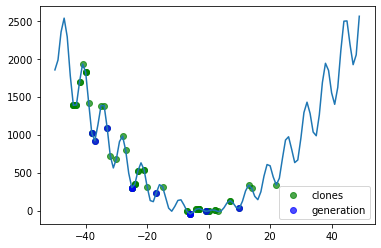

In [9]:
# kill_2

generation,performances = experiment.kill(clone_family)
print("generation:",generation)

alt_performance= [-p for p in performances]

plt.scatter(c_dist,[function_a(x) for x in c_dist] , c='g', label='clones', alpha=0.7)
plt.scatter(generation, alt_performance , c='b', label='generation', alpha=0.7)
plt.plot(X,Y)
plt.legend()

new genration: [[-32], [-8], [-13], [-13], [-14], [-20], [-20], [4], [4], [-1]]


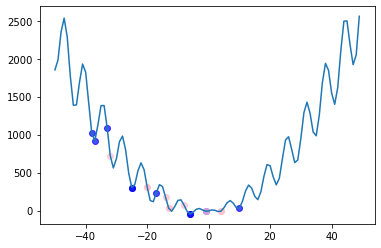

In [10]:
# reproduction_3

new_generation = experiment.reproduction(generation, performances)
print("new genration:",new_generation)

plt.scatter(generation, alt_performance , c='b', label='generation', alpha=0.7)
plt.scatter(new_generation, [function_a(x)for x in new_generation] , c='pink', label='newgeneration', alpha=0.7)
plt.plot(X,Y)

clone_family: [[[-32], [-28], [-36], [-28], [-31], [-31]], [[-8], [0], [-3], [-11], [-10], [-8]], [[-13], [-9], [-13], [-6], [-12], [-8]], [[-13], [-18], [-12], [-11], [-15], [-9]], [[-14], [-13], [-14], [-14], [-13], [-15]], [[-20], [-21], [-14], [-23], [-23], [-20]], [[-20], [-21], [-20], [-16], [-17], [-21]], [[4], [5], [9], [1], [5], [2]], [[4], [0], [5], [2], [6], [10]], [[-1], [-9], [-3], [-4], [5], [2]]]
c_dist: [[-32], [-28], [-36], [-28], [-31], [-31], [-8], [0], [-3], [-11], [-10], [-8], [-13], [-9], [-13], [-6], [-12], [-8], [-13], [-18], [-12], [-11], [-15], [-9], [-14], [-13], [-14], [-14], [-13], [-15], [-20], [-21], [-14], [-23], [-23], [-20], [-20], [-21], [-20], [-16], [-17], [-21], [4], [5], [9], [1], [5], [2], [4], [0], [5], [2], [6], [10], [-1], [-9], [-3], [-4], [5], [2]]


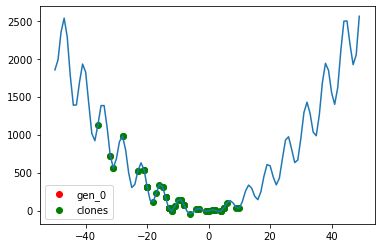

In [11]:
# mutation_3

experiment.actual_generation = new_generation
clone_family = experiment.mitosis()
print("clone_family:",clone_family)

c_dist=[]
for family in clone_family:
    for p in family:
        c_dist.append(p)

print("c_dist:",c_dist)

plt.scatter(new_generation,[function_a(x) for x in (new_generation)] , c='r', label='gen_0')
plt.scatter(c_dist,[function_a(x) for x in c_dist] , c='g', label='clones')
plt.plot(X,Y)
plt.legend()

generation: [[-31], [0], [-6], [-12], [-13], [-14], [-17], [4], [4], [-1]]


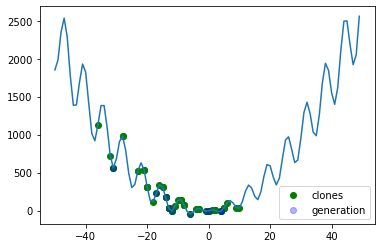

In [12]:
# kill_3

generation,performances = experiment.kill(clone_family)
print("generation:",generation)

alt_performance= [-p for p in performances]

plt.scatter(c_dist,[function_a(x) for x in c_dist] , c='g', label='clones')
plt.scatter(generation, alt_performance , c='b', label='generation', alpha=0.3)
plt.plot(X,Y)
plt.legend()

new genration: [[2], [-14], [-14], [-14], [-16], [-16], [-16], [-31], [-31], [-31]]


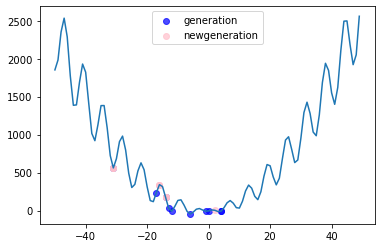

In [13]:
# reproduction_3
new_generation = experiment.reproduction(generation, performances)
print("new genration:",new_generation)

plt.scatter(generation, alt_performance , c='b', label='generation', alpha=0.7)
plt.scatter(new_generation, [function_a(x)for x in new_generation] , c='pink', label='newgeneration', alpha=0.7)
plt.plot(X,Y)
plt.legend()

Epochs 0/3000
Evolution process ended!
Last generation: [[1], [-16], [-32], [-32], [11], [-4], [-4], [-22], [-22], [-37]]


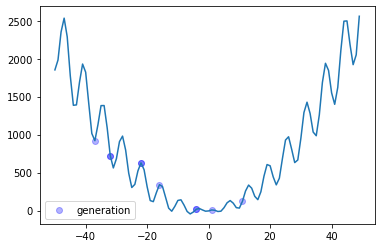

In [14]:
## Automate evolution

nr_epochs = 3000
last_generation = experiment.evolve(nr_epochs)
fit = [function_a(x) for x in last_generation] 
plt.scatter(last_generation, fit , c='b', label='generation', alpha=0.3)
plt.plot(X,Y)
plt.legend()